In [65]:
from package_nanonis.nanonis_sxm import * #nanonis_sxm 로드
import numpy as np 
import matplotlib.pyplot as plt
from package_utils.cmap_custom import nanox
from skimage.feature import peak_local_max

(-0.5, 255.5, 255.5, -0.5)

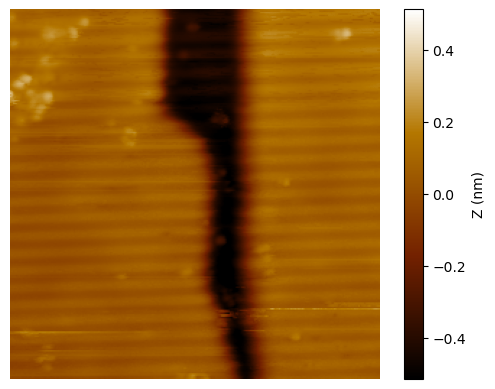

In [48]:
a = topography('Topo/TNS_STM6_#117_3782.sxm')
z = a.get_z('subtract plane fit')*1e9
plt.imshow(z, vmin = np.mean(z) - 3*np.std(z), vmax = np.mean(z) + 3*np.std(z), cmap = nanox())
cbar = plt.colorbar(location='right') #colormap 추가
cbar.set_label('Z (nm)') # 컬러맵 이름 추가
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

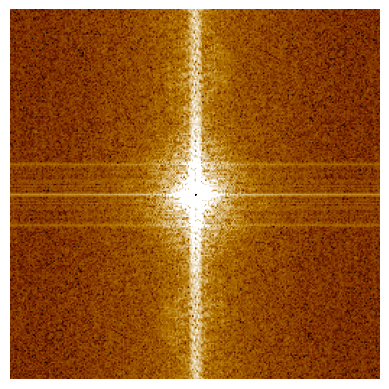

In [56]:
fft_log = fft.two_d_FFT_log(z)
plt.imshow(fft_log, vmin = np.mean(fft_log) - 3*np.std(fft_log), vmax = np.mean(fft_log) + 3*np.std(fft_log), cmap = nanox())
plt.axis('off')

array([[100,  99],
       [ 79,  99],
       [121, 101],
       [153,  99],
       [ 47, 101],
       [ 19, 100],
       [181, 100],
       [121, 173],
       [ 79,  27],
       [169, 146],
       [ 31,  54],
       [181,  31],
       [ 19, 169]], dtype=int64)

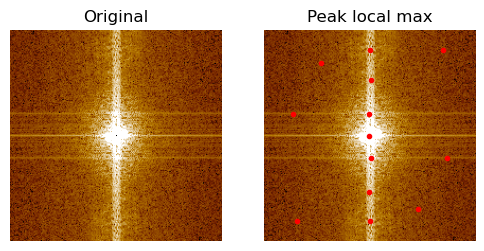

In [88]:
Scanpixels = a.header['scan_pixels'] # 스캔 픽셀 수
center = round(Scanpixels[0]/2) # 원점 지정 (y픽셀/2)
croppx = 100 # crop 크기
fft_log_crop = fft_log[center-croppx:center+croppx, center-croppx:center+croppx] # 보여줄 픽셀 ( y축, x축 순)

lmax = peak_local_max(fft_log_crop, min_distance=15)

# display results
fig, ax = plt.subplots(1, 2, figsize = (6,3), sharex=True, sharey=True)
ax[0].imshow(fft_log_crop, vmin = np.mean(fft_log_crop) - 3*np.std(fft_log_crop), vmax = np.mean(fft_log_crop) + 3*np.std(fft_log_crop), cmap = nanox())
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(fft_log_crop, vmin = np.mean(fft_log_crop) - 3*np.std(fft_log_crop), vmax = np.mean(fft_log_crop) + 3*np.std(fft_log_crop), cmap = nanox())
ax[1].plot(lmax[:, 1], lmax[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')

lmax

In [86]:
print(a.header['scan_pixels'])
print(a.header['scan_range'])

[256 256]
[3.e-08 3.e-08]


(-0.5, 511.5, 511.5, -0.5)

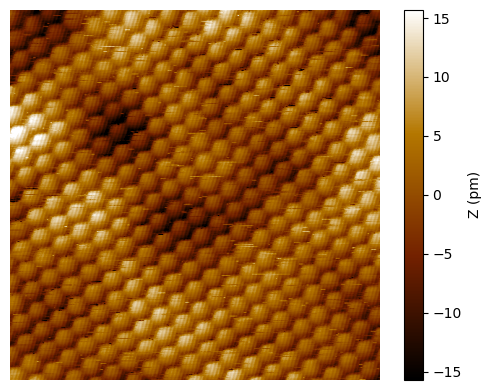

In [170]:
b= topography('Topo/Au111_W_LN2_0689.sxm')
y = b.get_z('subtract linear fit xy')*1e12
# y = b.get_z('differentiate', 'bwd')
sigma = 3
plt.imshow(y, vmin = np.mean(y) - sigma*np.std(y), vmax = np.mean(y) + sigma*np.std(y), cmap = nanox())
cbar = plt.colorbar(location='right') #colormap 추가
cbar.set_label('Z (pm)') 
plt.axis('off') 

(-0.5, 511.5, 511.5, -0.5)

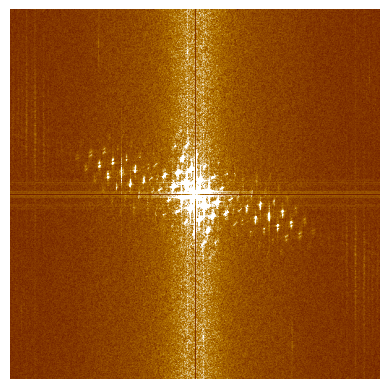

In [99]:
fft_sqrt = fft.two_d_FFT_sqrt(y)
plt.imshow(fft_sqrt, vmin = np.mean(fft_sqrt) - 3*np.std(fft_sqrt), vmax = np.mean(fft_sqrt) + 3*np.std(fft_sqrt), cmap = nanox())
plt.axis('off')

[array([11, 64], dtype=int64),
 array([15, 45], dtype=int64),
 array([19, 27], dtype=int64),
 array([23,  8], dtype=int64),
 array([26, 76], dtype=int64),
 array([30, 57], dtype=int64),
 array([35, 38], dtype=int64),
 array([39, 19], dtype=int64),
 array([41, 87], dtype=int64),
 array([46, 69], dtype=int64),
 array([49, 51], dtype=int64),
 array([54, 31], dtype=int64),
 array([59, 13], dtype=int64),
 array([61, 81], dtype=int64),
 array([65, 62], dtype=int64),
 array([70, 43], dtype=int64),
 array([74, 24], dtype=int64),
 array([77, 92], dtype=int64),
 array([81, 73], dtype=int64),
 array([85, 55], dtype=int64),
 array([89, 36], dtype=int64)]

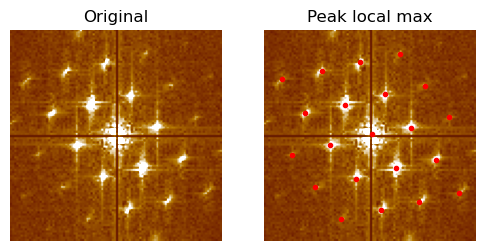

In [149]:
Scanpixels = b.header['scan_pixels'] # 스캔 픽셀 수
center = round(Scanpixels[0]/2) # 원점 지정 (y픽셀/2)
croppx = 50# crop 크기
fft_sqrt_crop = fft_sqrt[center-croppx:center+croppx, center-croppx:center+croppx] # 보여줄 픽셀 ( y축, x축 순)

lmax = peak_local_max(fft_sqrt_crop, min_distance=7)

# display results
fig, ax = plt.subplots(1, 2, figsize = (6,3), sharex=True, sharey=True)
ax[0].imshow(fft_sqrt_crop, vmin = np.mean(fft_sqrt_crop) - 3*np.std(fft_sqrt_crop), vmax = np.mean(fft_sqrt_crop) + 3*np.std(fft_sqrt_crop), cmap = nanox())
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(fft_sqrt_crop, vmin = np.mean(fft_sqrt_crop) - 3*np.std(fft_sqrt_crop), vmax = np.mean(fft_sqrt_crop) + 3*np.std(fft_sqrt_crop), cmap = nanox())
ax[1].plot(lmax[:, 1], lmax[:, 0], 'r.')
ax[1].axis('off')
ax[1].set_title('Peak local max')

sorted_lmax = sorted(lmax,key=lambda x:x[0]) # y좌표 오름차순 정리
sorted_lmax

In [131]:
print(b.header['scan_pixels'])
print(b.header['scan_range'])

[512 512]
[5.e-09 5.e-09]
